OBSERVATIONS AND INSIGHTS

In [438]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/studyresults.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [439]:
# Combine the data into a single dataset
data_set = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
data_set

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [440]:
# Reminding myself what the columns are named
data_set.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [441]:
# Checking the number of mice
count_mice = len(data_set['Mouse ID'].unique())
print(f"We have {count_mice} mice.")

We have 249 mice.


In [442]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_set.loc[data_set.duplicated(subset =['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
# (note to self) OUTPUT OF ABOVE = array(['g989'], dtype=object)

In [443]:
# Optional: Get all the data for the duplicate mouse ID. 
removing_g989 = data_set[data_set['Mouse ID']== 'g989']
removing_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [444]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_set[data_set["Mouse ID"].isin(duplicate_mice) == False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [445]:
# Checking the number of mice in the clean DataFrame.
count_mice = len(clean_data['Mouse ID'].unique())
print(f"We have {count_mice} mice.")

We have 248 mice.


SUMMARY STATISTICS

In [446]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    # This method is the most straighforward, creating multiple series and putting them all together at the end.
    # This method produces everything in a single groupby function
    
summary_statistics = clean_data.loc[:, ['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen']]

mean = summary_statistics.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = summary_statistics.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance = summary_statistics.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
st_dev = summary_statistics.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem = summary_statistics.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

sum_stat_df = pd.DataFrame({"MEAN TUMOUR VOLUME":mean, "MEDIAN TUMOUR VOLUME":median, "VARIANCE":variance, "STANDARD DEVIATION":st_dev, "SEM":sem})

# FORMAT TO BE FOUNDED TO 2 DECIMAL PLACES
sum_stat_df = sum_stat_df.round(2)
sum_stat_df

,MEAN TUMOUR VOLUME,MEDIAN TUMOUR VOLUME,VARIANCE,STANDARD DEVIATION,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


BAR AND PIE CHARTS

Text(0.5, 1.0, 'Total number of mice per treatment type')

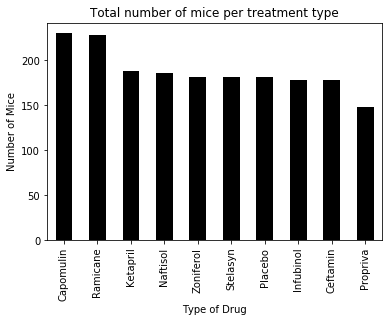

In [447]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
treatments = clean_data['Drug Regimen'].value_counts()
y_axis = treatments.values
x_axis = treatments.index

treatments.plot(kind="bar", facecolor='black',)

# FORMAT
plt.ylabel("Number of Mice")
plt.xlabel("Type of Drug")
plt.title("Total number of mice per treatment type")

In [448]:
# DOUBLE CHECK IF DATA VALUES ARE RIGHT
capomulin = clean_data[clean_data['Drug Regimen']== 'Capomulin']
# = 230 = correct

Ceftamin = clean_data[clean_data['Drug Regimen']== 'Ceftamin']
# = 178 = correct

Infubinol = clean_data[clean_data['Drug Regimen']== 'Infubinol']
# = 178 = correct --> same as ceftamine

Ketapril = clean_data[clean_data['Drug Regimen']== 'Ketapril']
# = 188 = correct

Naftisol = clean_data[clean_data['Drug Regimen']== 'Naftisol']
# = 186 = correct - slightly lower than Ketapril

Placebo = clean_data[clean_data['Drug Regimen']== 'Placebo']
# = 181 = correct, lower than Naftisol but higher than Ceftamin and Infubinol

Propriva = clean_data[clean_data['Drug Regimen']== 'Propriva']
# = 148 = correct, much lower than all the other data on the bar chart

Ramicane = clean_data[clean_data['Drug Regimen']== 'Ramicane']
# = 228 = correct, slightly lower than capomulin

Stelasyn = clean_data[clean_data['Drug Regimen']== 'Stelasyn']
# = 181 = correct, same as Placebo and Ketapril

Zoniferol = clean_data[clean_data['Drug Regimen']== 'Zoniferol']
# 182 = correct slighly higher than those with 181 mice

# Zoniferol.count()

# ADD ALL VALUES TO SEE IF IT COMES TO 1880
total = 230 + 178 + 178 + 188 + 186 + 181 + 148 + 228 + 181 + 182
total
# woohoo

1880

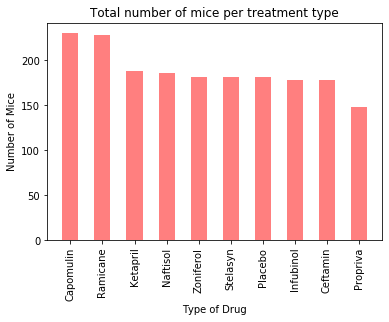

In [449]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatments = clean_data['Drug Regimen'].value_counts()

y_axis = treatments.values
x_axis = np.arange(0, len(y_axis),1)
x_treatment = treatments.index

plt.bar(x_treatment, y_axis, color='r', alpha=0.5, align= "center", width=.5)

# FORMAT
plt.ylabel("Number of Mice")
plt.xlabel("Type of Drug")
plt.title("Total number of mice per treatment type")
plt.xticks(rotation=90)
plt.savefig('barchart')

In [450]:
# MAKE A DATA FRAME TO STORE GENDER DATA

mouse_genders = pd.DataFrame(gender_groups.size())

mouse_genders = pd.DataFrame(mouse_genders.groupby(["Sex"]).count())
mouse_genders.columns = ['Total Count']

mouse_genders["Percentage of Sex"] = (100*(mouse_genders["Total Count"]/mouse_genders["Total Count"].sum())).round(3)

mouse_genders

,Total Count,Percentage of Sex
Sex,,
Female,123,49.597
Male,125,50.403


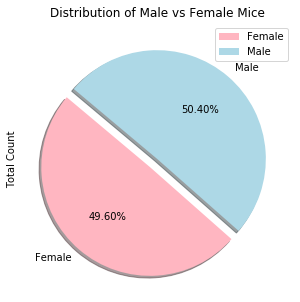

In [451]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['lightpink', "lightblue"]
explode = (0.1,0)
pandas_pie = mouse_genders.plot.pie(y="Total Count", figsize=(5,5), colors=colors, startangle=140, explode=explode, shadow=True, autopct="%1.2f%%")
plt.title("Distribution of Male vs Female Mice")
plt.savefig('piechart')

Text(0.5, 1.0, 'Distribution of Male vs Female Mice')

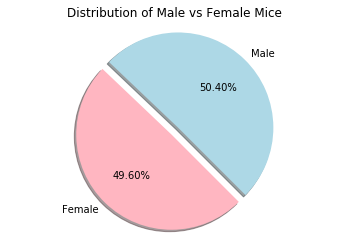

In [452]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
counts = ["125", "123"]
colors = ["lightblue", "lightpink"]
explode = (0.1,0)

#make the chart
plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=315)
plt.axis("equal")
plt.title("Distribution of Male vs Female Mice")

QUARTILES, OUTLIERS AND BOXPLOTS

In [453]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin"), :]
ramicane_df = clean_data.loc[(clean_data["Drug Regimen"] == "Ramicane"), :]
infubinol_df = clean_data.loc[(clean_data["Drug Regimen"] == "Infubinol"), :]
ceftamin_df = clean_data.loc[(clean_data["Drug Regimen"] == "Ceftamin"), :]

In [454]:
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [455]:
# DATA FOR CAPOMULIN
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_lastvol = pd.DataFrame(capomulin_last)
capomulin_45merged = pd.merge(capomulin_lastvol, clean_data, on=("Mouse ID", "Timepoint"), how="left")
capomulin_45merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [456]:
capomulin_tumours = capomulin_45merged["Tumor Volume (mm3)"]
quartiles = capomulin_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq= quartiles[0.75]
iqr = upperq - lowerq

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)
print(f"Outliers for Capomulin could be a tumor below {lowerbound}mm3 or one above {upperbound}mm3.")

Outliers for Capomulin could be a tumor below 20.70456164999999mm3 or one above 51.83201549mm3.


In [457]:
# DATA FOR RAMICANE
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_lastvol = pd.DataFrame(ramicane_last)
ramicane_45merged = pd.merge(ramicane_lastvol, clean_data, on=("Mouse ID", "Timepoint"), how="left")
ramicane_45merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
5,c758,45,33.397653,1,Ramicane,Male,9,17
6,d251,45,37.311236,2,Ramicane,Female,8,19
7,e662,45,40.659006,2,Ramicane,Male,8,24
8,g791,45,29.128472,1,Ramicane,Male,11,16
9,i177,45,33.562402,3,Ramicane,Male,10,18


In [458]:
ramicane_tumours = ramicane_45merged["Tumor Volume (mm3)"]
quartiles = ramicane_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq= quartiles[0.75]
iqr = upperq - lowerq

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)
print(f"Outliers for Ramicane could be a tumor below {lowerbound}mm3 or one above {upperbound}mm3.")

Outliers for Ramicane could be a tumor below 17.912664470000003mm3 or one above 54.30681135mm3.


In [459]:
# DATA FOR INFUBINOL
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_lastvol = pd.DataFrame(infubinol_last)
infubinol_45merged = pd.merge(infubinol_lastvol, clean_data, on=("Mouse ID", "Timepoint"), how="left")
infubinol_45merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28
5,c326,5,36.321346,0,Infubinol,Female,18,25
6,c895,30,60.969711,2,Infubinol,Female,7,29
7,e476,45,62.435404,1,Infubinol,Male,23,26
8,f345,45,60.918767,1,Infubinol,Male,23,26
9,i386,40,67.289621,4,Infubinol,Female,23,29


In [460]:
infubinol_tumours = infubinol_45merged["Tumor Volume (mm3)"]
quartiles = infubinol_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq= quartiles[0.75]
iqr = upperq - lowerq

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)
print(f"Outliers for Infubinol could be a tumor below {lowerbound}mm3 or one above {upperbound}mm3.")

Outliers for Infubinol could be a tumor below 36.83290494999999mm3 or one above 82.74144559000001mm3.


In [461]:
# DATA FOR CEFTAMIN
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_lastvol = pd.DataFrame(ceftamin_last)
ceftamin_45merged = pd.merge(ceftamin_lastvol, clean_data, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_45merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25
5,h531,5,47.784682,0,Ceftamin,Male,5,27
6,j296,45,61.849023,3,Ceftamin,Female,24,30
7,k210,45,68.923185,3,Ceftamin,Male,15,28
8,l471,45,67.748662,1,Ceftamin,Female,7,28
9,l490,30,57.918381,3,Ceftamin,Male,24,26


In [462]:
ceftamin_tumours = ceftamin_45merged["Tumor Volume (mm3)"]
quartiles = ceftamin_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq= quartiles[0.75]
iqr = upperq - lowerq

lowerbound = lowerq - (1.5*iqr)
upperbound = upperq + (1.5*iqr)
print(f"Outliers for Ceftamin could be a tumor below {lowerbound}mm3 or one above {upperbound}mm3.")

Outliers for Ceftamin could be a tumor below 25.355449580000002mm3 or one above 87.66645829999999mm3.


In [463]:
# Put treatments into a list for for loop (and later for plot labels)
ceftamin_list= ceftamin_45merged.values.tolist()
infubinol_list= infubinol_45merged.values.tolist()
ramicane_list= ramicane_45merged.values.tolist()
capomulin_list= capomulin_45merged.values.tolist()
new_list = []
(ceftamin_list, infubinol_list, ramicane_list, capomulin_list, new_list)

([['a275', 45, 62.99935619, 3, 'Ceftamin', 'Female', 20, 28],
  ['b447', 0, 45.0, 0, 'Ceftamin', 'Male', 2, 30],
  ['b487', 25, 56.05774909, 1, 'Ceftamin', 'Female', 6, 28],
  ['b759', 30, 55.74282869, 1, 'Ceftamin', 'Female', 12, 25],
  ['f436', 15, 48.72207785, 2, 'Ceftamin', 'Female', 3, 25],
  ['h531', 5, 47.784681799999994, 0, 'Ceftamin', 'Male', 5, 27],
  ['j296', 45, 61.84902336, 3, 'Ceftamin', 'Female', 24, 30],
  ['k210', 45, 68.92318457, 3, 'Ceftamin', 'Male', 15, 28],
  ['l471', 45, 67.74866174, 1, 'Ceftamin', 'Female', 7, 28],
  ['l490', 30, 57.91838132, 3, 'Ceftamin', 'Male', 24, 26],
  ['l558', 10, 46.78453491, 0, 'Ceftamin', 'Female', 13, 30],
  ['l661', 45, 59.85195552, 3, 'Ceftamin', 'Male', 18, 26],
  ['l733', 45, 64.29983003, 1, 'Ceftamin', 'Female', 4, 30],
  ['o287', 45, 59.74190064, 4, 'Ceftamin', 'Male', 2, 28],
  ['p438', 45, 61.43389223, 1, 'Ceftamin', 'Female', 11, 26],
  ['q483', 40, 64.19234114, 1, 'Ceftamin', 'Male', 6, 26],
  ['t573', 0, 45.0, 0, 'Ceftamin

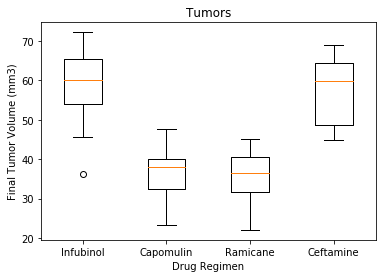

In [464]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_for_box = [infubinol_tumours, capomulin_tumours, ramicane_tumours, ceftamin_tumours]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumors")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")

ax1.boxplot(data_for_box, labels=["Infubinol", "Capomulin", "Ramicane", "Ceftamine"])
plt.savefig('boxplot')
plt.show()

LINE AND SCATTER PLOT

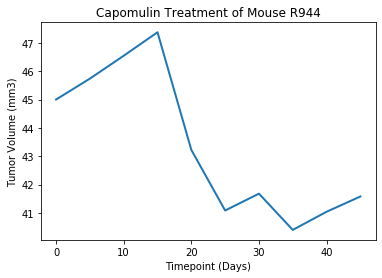

In [465]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# SELECTED MOUSE r944

mouse_r944 = capomulin_df.loc[capomulin_df["Mouse ID"] == "r944", :]

for_x_axis = mouse_r944["Timepoint"]
tumor_size = mouse_r944["Tumor Volume (mm3)"]

plt.title("Capomulin Treatment of Mouse R944")
plt.plot(for_x_axis, tumor_size, linewidth=2, markersize=12)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('linechart')
plt.show()

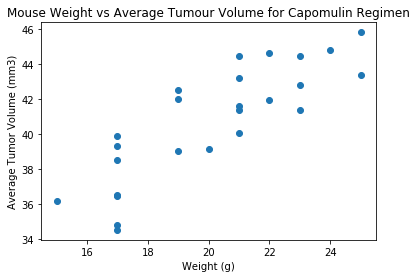

In [466]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_av_tumor = capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_av_tumor["Weight (g)"], capomulin_av_tumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumour Volume for Capomulin Regimen")

plt.savefig('scatterplot')
plt.show()

CORRELATION AND REGRESSION

In [467]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_av_tumor["Weight (g)"], capomulin_av_tumor["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coeffiencent between mouse weight and average tumor volume for Capomulin regimen is {correlation}.")

The correlation coeffiencent between mouse weight and average tumor volume for Capomulin regimen is 0.84.


In [468]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
linear_regression = st.linregress(capomulin_av_tumor["Weight (g)"],capomulin_av_tumor["Tumor Volume (mm3)"])
linear_regression

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

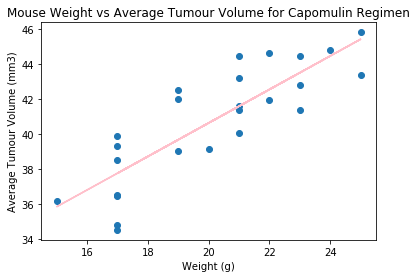

In [469]:
slope = 0.9544396890241045
intercept = 21.552160532685015

y_values = capomulin_av_tumor["Weight (g)"]*slope+intercept
plt.scatter(capomulin_av_tumor["Weight (g)"],capomulin_av_tumor["Tumor Volume (mm3)"])
plt.plot(capomulin_av_tumor["Weight (g)"],y_values,color="pink")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.title("Mouse Weight vs Average Tumour Volume for Capomulin Regimen")

plt.savefig('linearregression')
plt.show()